In [1]:
from torchvision import transforms
from util import LowPassTransform, LowPassTransform3D
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import random
import torch

mean = (1.2883e-06)#, 1.2883e-06, 1.2883e-06) # todo
std = (0.0005)#, 0.0005, 0.0005)

# 3 Channels

In [2]:

rand = transforms.RandomChoice([
            transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)) # ok
            ])

rand_pos = transforms.RandomChoice([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(degrees=[90,90]),
        transforms.RandomRotation(degrees=[180, 180]),
        transforms.RandomRotation(degrees=[270, 270])
    ])


erase_transform = transforms.RandomApply([
                transforms.RandomErasing(p=0.05, scale=(0.04, 0.05), ratio=(0.2,0.6), value=100),
                transforms.RandomErasing(p=0.05, scale=(0.04, 0.05), ratio=(0.3,0.6), value=100),
                transforms.RandomErasing(p=0.1, scale=(0.03, 0.04), ratio=(0.4,0.6), value=100),
                transforms.RandomErasing(p=0.1, scale=(0.03, 0.04), ratio=(0.5,0.5), value=100),
                transforms.RandomErasing(p=0.2, scale=(0.02, 0.03), ratio=(0.5,0.5), value=100),
                transforms.RandomErasing(p=0.2, scale=(0.02, 0.03), ratio=(0.4,0.6), value=100),
                transforms.RandomErasing(p=0.5, scale=(0.01, 0.02), ratio=(0.3,0.6), value=100),
                transforms.RandomErasing(p=0.5, scale=(0.01, 0.02), ratio=(0.2,0.6), value=100),
    ],p=1)
    
    
train_transform1 = transforms.Compose([
                LowPassTransform3D(threshold=50, probability=1),
                transforms.RandomSolarize(threshold=50, p=1), # foarte bun combinat cu low pass
                rand_pos,
                rand,
                erase_transform,
    ])



lp = transforms.Compose([LowPassTransform3D(threshold=50, probability=1),
                        transforms.RandomSolarize(threshold=50, p=1)])

tens = transforms.Lambda(lambda x: torch.tensor(x))

                          
train_transform =  transforms.Compose([
                    transforms.Lambda(lambda x: np.transpose(np.asarray(x), (2,0,1))),
                    transforms.RandomChoice([lp, tens],p=[0.1,0.0]),
                    rand_pos,
                    erase_transform,
            ])

val_transform = transforms.Compose([
    transforms.Lambda(lambda x: np.asarray(x)),
    tens,
    rand_pos
])

In [3]:
    
test_tr = transforms.Compose([
                transforms.Lambda(lambda x: np.transpose(np.asarray(x), (2,0,1))),
                lp,
                # rand_pos,
                # rand,
                # erase_transform,
                transforms.ToPILImage()
    ])


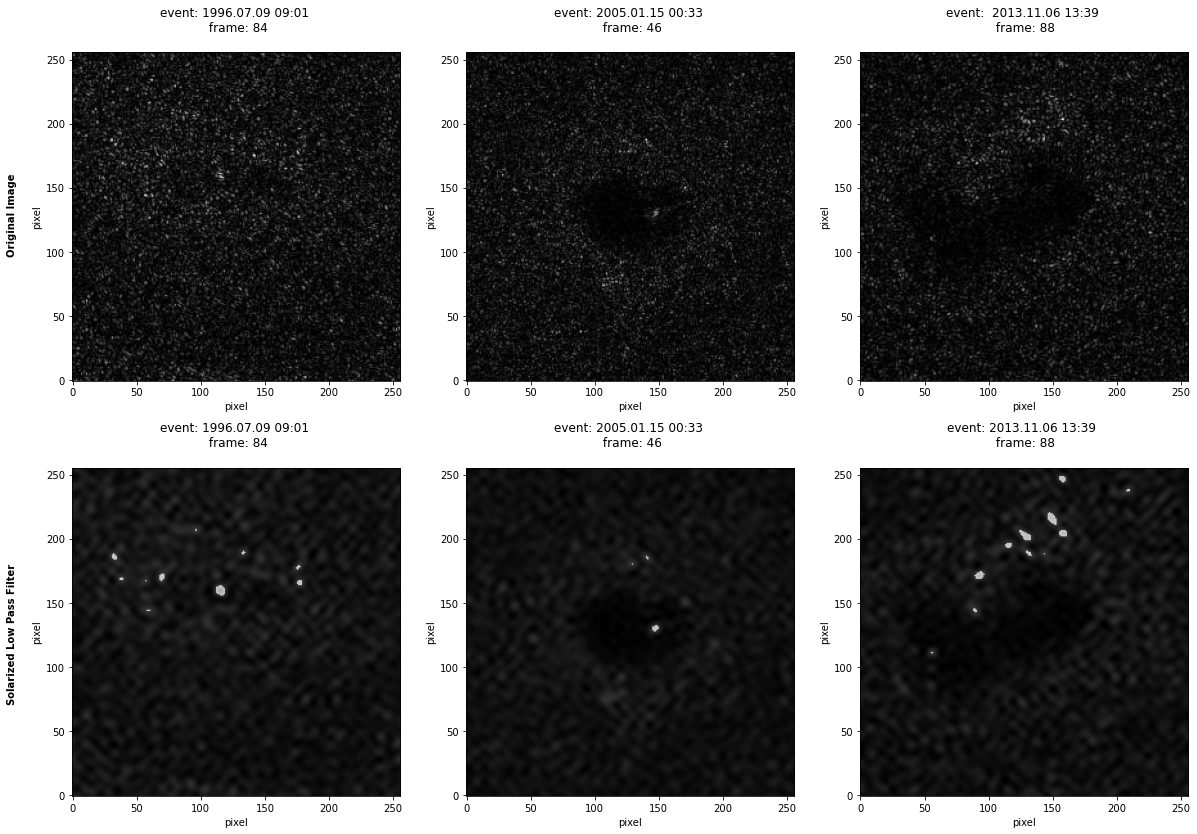

In [4]:
fig = plt.figure(figsize=(20, 14))
img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_1996_07_09_09_01_00_84.jpg")
ax = fig.add_subplot(2, 3, 1)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 1996.07.09 09:01 \n frame: 84\n')
ax.imshow(img, origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2005_01_15_00_33_00_46.jpg")
ax = fig.add_subplot(2, 3, 2)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 2005.01.15 00:33 \n frame: 46\n')
ax.imshow(img, origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2013_11_06_13_39_00_88.jpg")
ax = fig.add_subplot(2, 3, 3)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event:  2013.11.06 13:39 \n frame: 88\n')
ax.imshow(img, origin='lower')


img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_1996_07_09_09_01_00_84.jpg")
ax = fig.add_subplot(2, 3, 4)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 1996.07.09 09:01 \n frame: 84\n')
ax.imshow(test_tr(img), origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2005_01_15_00_33_00_46.jpg")
ax = fig.add_subplot(2, 3, 5)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 2005.01.15 00:33 \n frame: 46\n')
ax.imshow(test_tr(img), origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2013_11_06_13_39_00_91.jpg")
ax = fig.add_subplot(2, 3, 6)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 2013.11.06 13:39 \n frame: 88\n')
ax.imshow(test_tr(img), origin='lower')

fig.text(0.08, 0.7, '      Original Image', va='center', rotation='vertical', weight='bold')
fig.text(0.08, 0.295, 'Solarized Low Pass Filter', va='center', rotation='vertical', weight='bold')
plt.savefig('solarized_low_pass_filter.png')

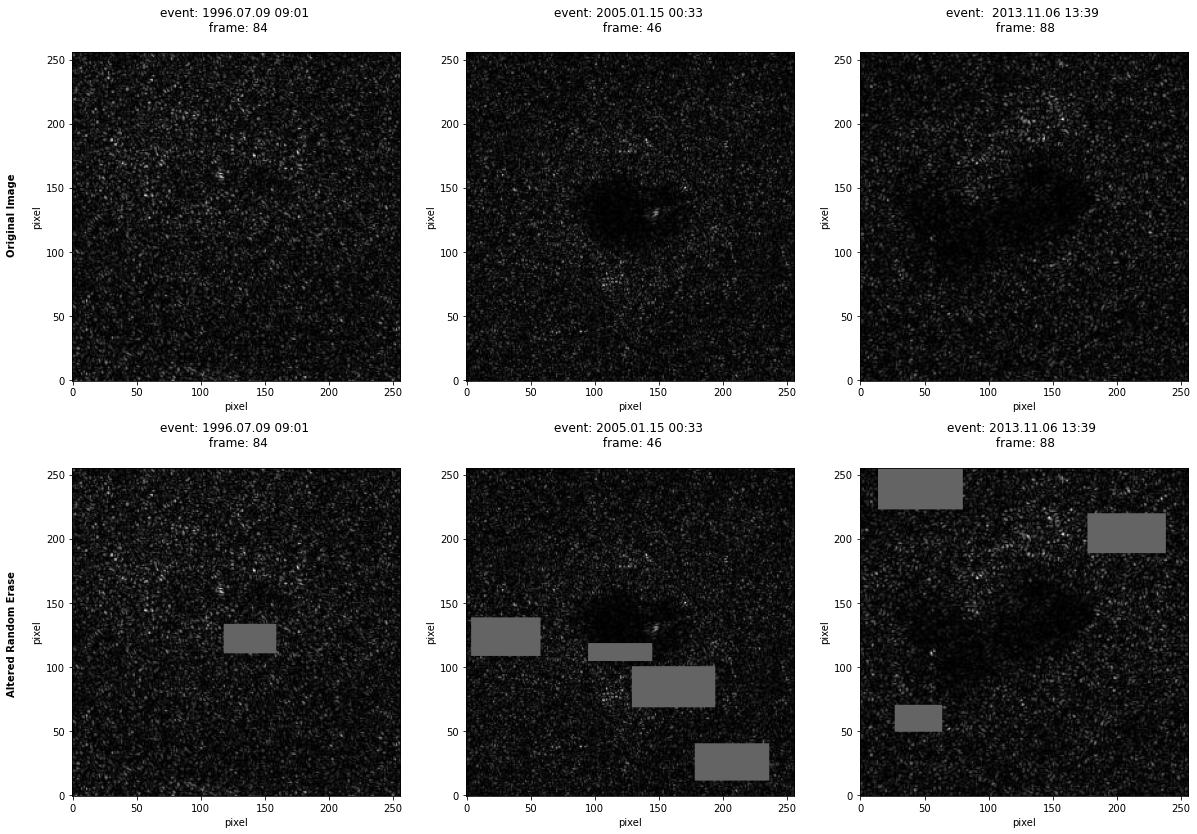

In [38]:
    
test_tr = transforms.Compose([
                transforms.Lambda(lambda x: np.transpose(np.asarray(x), (2,0,1))),
                tens,
                # rand_pos,
                # rand,
                erase_transform,
                transforms.ToPILImage()
    ])


fig = plt.figure(figsize=(20, 14))
img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_1996_07_09_09_01_00_84.jpg")
ax = fig.add_subplot(2, 3, 1)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 1996.07.09 09:01 \n frame: 84\n')
ax.imshow(img, origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2005_01_15_00_33_00_46.jpg")
ax = fig.add_subplot(2, 3, 2)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 2005.01.15 00:33 \n frame: 46\n')
ax.imshow(img, origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2013_11_06_13_39_00_88.jpg")
ax = fig.add_subplot(2, 3, 3)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event:  2013.11.06 13:39 \n frame: 88\n')
ax.imshow(img, origin='lower')


img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_1996_07_09_09_01_00_84.jpg")
ax = fig.add_subplot(2, 3, 4)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 1996.07.09 09:01 \n frame: 84\n')
ax.imshow(test_tr(img), origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2005_01_15_00_33_00_46.jpg")
ax = fig.add_subplot(2, 3, 5)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 2005.01.15 00:33 \n frame: 46\n')
ax.imshow(test_tr(img), origin='lower')

img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_2013_11_06_13_39_00_91.jpg")
ax = fig.add_subplot(2, 3, 6)
ax.set_xlabel(f'pixel')
ax.set_ylabel(f'pixel')
ax.set_title(f'event: 2013.11.06 13:39 \n frame: 88\n')
ax.imshow(test_tr(img), origin='lower')

fig.text(0.08, 0.7, '      Original Image', va='center', rotation='vertical', weight='bold')
fig.text(0.08, 0.295, 'Altered Random Erase', va='center', rotation='vertical', weight='bold')
plt.savefig('altered_random_erase.png')

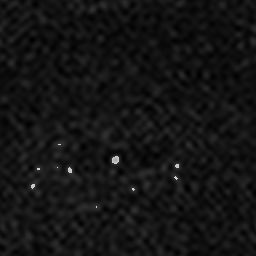

In [11]:
img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/img_poz_1996_07_09_09_01_00_84.jpg")
test_tr(img)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'

fig = plt.figure(figsize=(20, 22))
columns = 4
rows = 4
idx=1
first_axes = []

for k in range(180,184):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C24_TEST_pos-concat/neg/img_poz_2012_05_08_13_02_00_{k}.png")
    tr_img = test_tr(img)
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')
    if (k==180):
        first_axes.append(ax) 
    ax.imshow(tr_img, origin='lower')
    idx +=1

for k in range(184,188):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C24_TEST_pos-concat/neg/img_poz_2012_05_08_13_02_00_{k}.png")
    tr_img = test_tr(img)
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')
    if (k==184):
        first_axes.append(ax) 
    ax.imshow(tr_img, origin='lower')
    idx +=1
    
for k in range(180,184):
    img = Image.open(f"/home/vanessa/Desktop/Detections/cropped-images/detected_regions_img_poz_2012_05_08_13_02_00_{k}.png")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')

    if (k==180):
        first_axes.append(ax) 
    ax.imshow(img, origin='lower')
    idx +=1

for k in range(184,188):
    img = Image.open(f"/home/vanessa/Desktop/Detections/cropped-images/detected_regions_img_poz_2012_05_08_13_02_00_{k}.png")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')
    if (k==184):
        first_axes.append(ax) 
    ax.imshow(img, origin='lower')    
    idx +=1


fig.text(0.08, 0.7, 'Solarized Low Pass SQ Region', va='center', rotation='vertical', weight='bold')
fig.text(0.08, 0.3, 'Object Detection SQ Region', va='center', rotation='vertical', weight='bold')

# for k, axes in enumerate(first_axes):
    # if (k == 3):
    #     axes.set_ylabel(f'Object Detection SQ Region\n\n pixel')
    # elif (k==1):
    #     axes.set_ylabel(f'Solarized Low Pass SQ Region\n\n pixel')
plt.savefig('detections_and_lowpass_2012_05_08_event.png')

# plt.show()

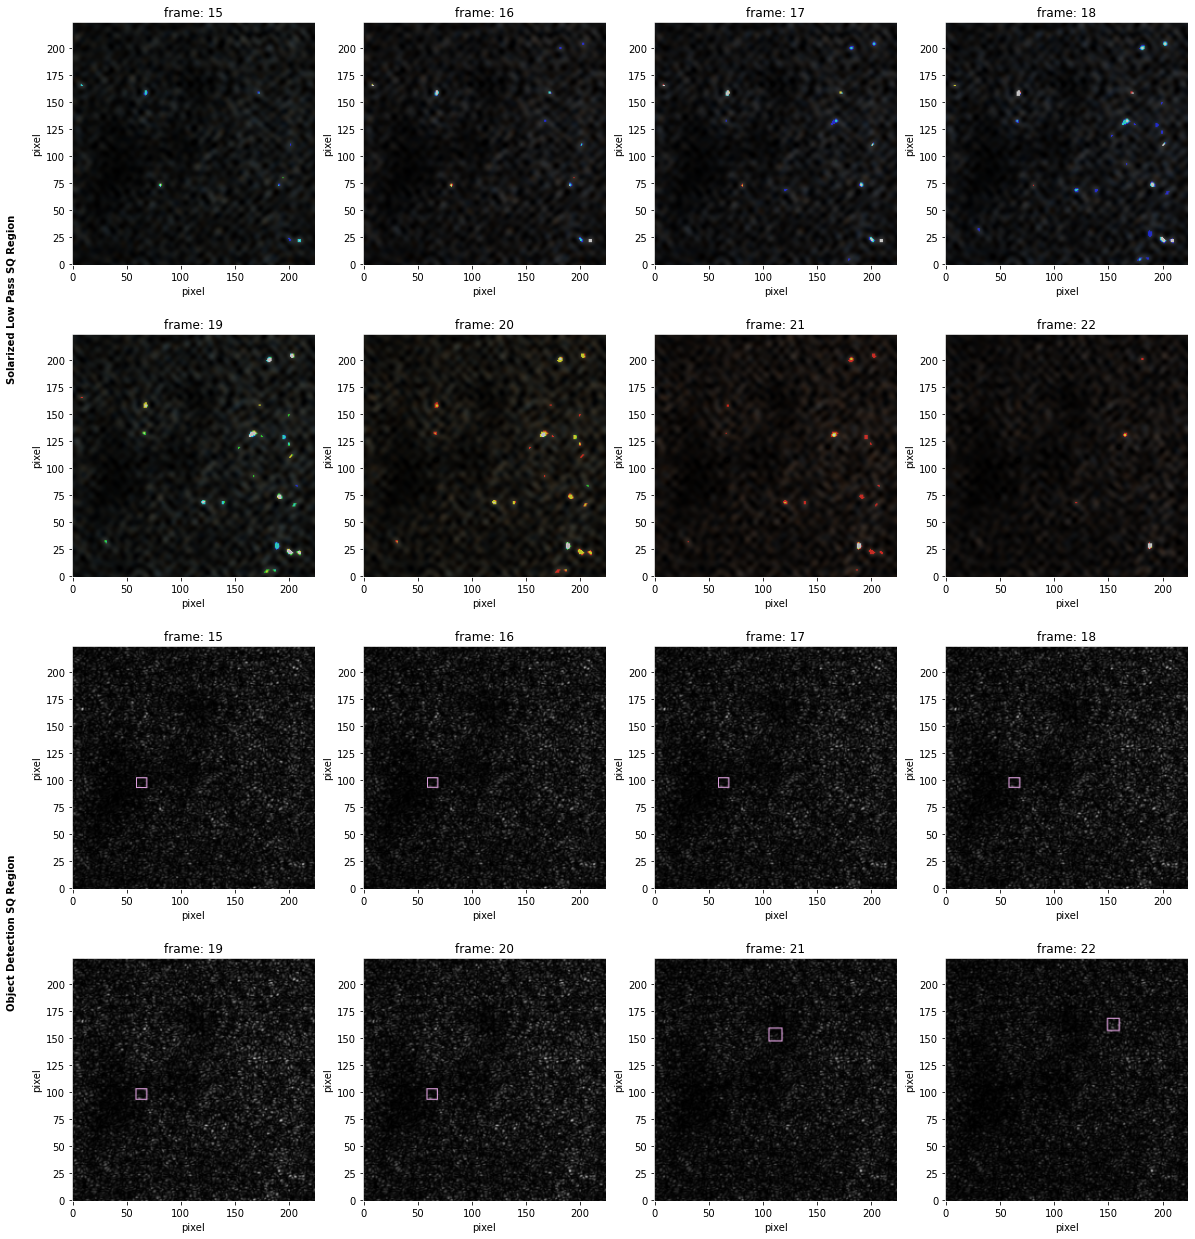

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'

fig = plt.figure(figsize=(20, 22))
columns = 4
rows = 4
idx=1
first_axes = []

for k in range(15,19):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C24_TEST_pos-concat/neg/img_poz_2011_12_30_03_03_00_{k}.png")
    tr_img = test_tr(img)
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')
    if (k==180):
        first_axes.append(ax) 
    ax.imshow(tr_img, origin='lower')
    idx +=1

for k in range(19,23):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C24_TEST_pos-concat/neg/img_poz_2011_12_30_03_03_00_{k}.png")
    tr_img = test_tr(img)
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')
    if (k==184):
        first_axes.append(ax) 
    ax.imshow(tr_img, origin='lower')
    idx +=1
    
for k in range(15,19):
    img = Image.open(f"/home/vanessa/Desktop/Detections/cropped-images/detected_regions_img_poz_2011_12_30_03_03_00_{k}.png")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')

    if (k==180):
        first_axes.append(ax) 
    ax.imshow(img, origin='lower')
    idx +=1

for k in range(19,23):
    img = Image.open(f"/home/vanessa/Desktop/Detections/cropped-images/detected_regions_img_poz_2011_12_30_03_03_00_{k}.png")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {k}')
    if (k==184):
        first_axes.append(ax) 
    ax.imshow(img, origin='lower')    
    idx +=1


fig.text(0.08, 0.7, 'Solarized Low Pass SQ Region', va='center', rotation='vertical', weight='bold')
fig.text(0.08, 0.3, 'Object Detection SQ Region', va='center', rotation='vertical', weight='bold')

plt.savefig('detections_and_lowpass_2011_12_30_event.png')

# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'


fig = plt.figure(figsize=(20, 12))
columns = 3
rows = 2
idx=1
first_axes = []

# pos_frames = [k for k in range(69,88)]
plot_frames = [k for k in range(70,86,step=2)]

easy_event = 'img_poz_1996_07_09_09_01_00'

for k,frame in enumerate(plot_frames):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/poz/{easy_event}_{frame}.jpg")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    if (idx <= 3):
        ax.set_title(f'Event: {frame[2]} \n\n frame: {frame[3]}')
    else:
        ax.set_title(f'frame: {frame[3]}')
    first_axes.append(ax) 
    ax.imshow(img, origin='lower')
    idx +=1

for k, axes in enumerate(first_axes):
    if (k == 0):
        axes.set_ylabel(f'Negative Frames \n\n pixel')
    elif (k==3):
        axes.set_ylabel(f'Positive Frames\n\n pixel')
plt.savefig('sample_data.png', transparent=True)

# plt.show()

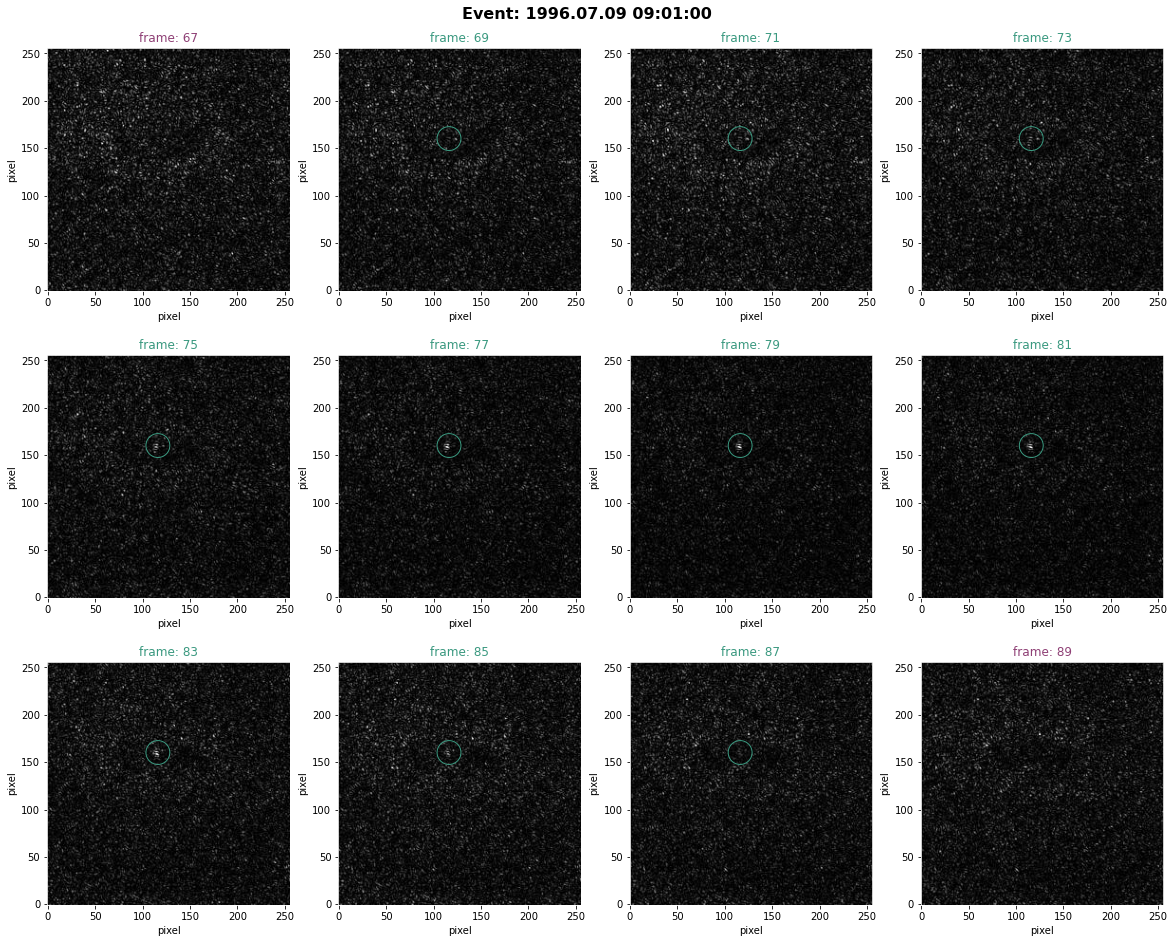

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle

matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'


fig = plt.figure(figsize=(20, 16))
columns = 4
rows = 3
idx=1
first_axes = []

# pos_frames = [k for k in range(89,110)]
# plot_frames = [k for k in range(88,111,2)]
pos_frames = [k for k in range(69,88)]
plot_frames = [k for k in range(67,91,2)]

# easy_event = 'img_poz_2012_03_05_19_27_00'
easy_event = 'img_poz_1996_07_09_09_01_00'

for k,frame in enumerate(plot_frames):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/{'poz' if frame in pos_frames else 'neg'}/{easy_event}_{frame}.jpg")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    ax.set_title(f'frame: {frame}', color='#3B9980' if frame in pos_frames else '#8F4176')
    first_axes.append(ax) 
    if frame in pos_frames:
        circ = Circle((116.16224,160.18571), 12.601458, color='#3B9980', fill=False)
        ax.add_patch(circ)

    ax.imshow(img, origin='lower')
    idx +=1



fig.suptitle('Event: 1996.07.09 09:01:00', y=0.91, size=16, weight='bold')
plt.savefig('1996_07_09_09_01_00_sunquake_example.png', transparent=True)

plt.show()

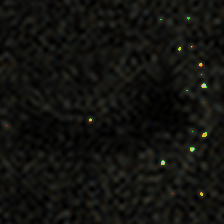

In [24]:
img = Image.open("/home/vanessa/Dev/DATASETS/C24_TEST_pos-concat/neg/img_poz_2012_05_08_13_02_00_30.png")
x = test_tr(img)
x

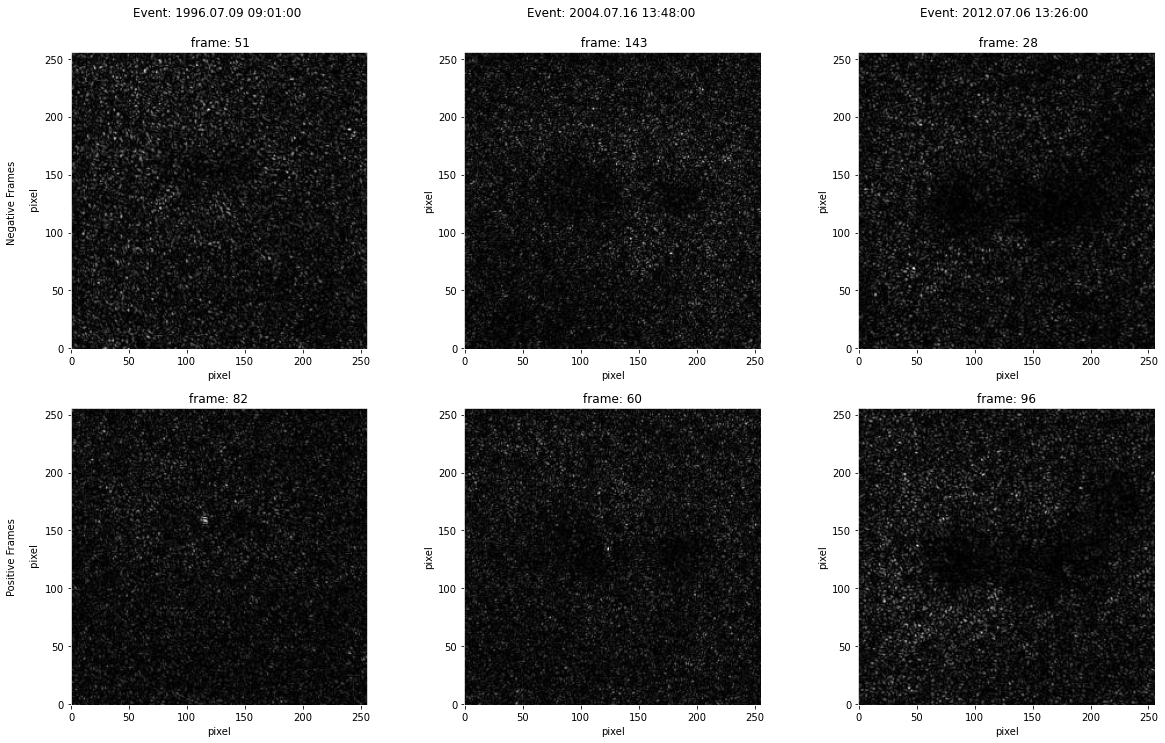

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'


fig = plt.figure(figsize=(20, 12))
columns = 3
rows = 2
idx=1
first_axes = []

frames= [('neg', 'img_poz_1996_07_09_09_01_00_51', '1996.07.09 09:01:00','51'), ('neg', 'img_poz_2004_07_16_13_48_00_143', '2004.07.16 13:48:00','143'),('neg', 'img_poz_2012_07_06_13_26_00_28', '2012.07.06 13:26:00','28'),('poz', 'img_poz_1996_07_09_09_01_00_82',  '1996.07.09 09:01:00','82'),('poz', 'img_poz_2004_07_16_13_48_00_60','2004.07.16 13:48:00','60'), ('poz', 'img_poz_2012_07_06_13_26_00_96', '2012.07.06 13:26:00','96'),]

for k,frame in enumerate(frames):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/{frame[0]}/{frame[1]}.jpg")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    if (idx <= 3):
        ax.set_title(f'Event: {frame[2]} \n\n frame: {frame[3]}')
    else:
        ax.set_title(f'frame: {frame[3]}')
    first_axes.append(ax) 
    ax.imshow(img, origin='lower')
    idx +=1

for k, axes in enumerate(first_axes):
    if (k == 0):
        axes.set_ylabel(f'Negative Frames \n\n pixel')
    elif (k==3):
        axes.set_ylabel(f'Positive Frames\n\n pixel')
plt.savefig('sample_data.png', transparent=True)

# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'


fig = plt.figure(figsize=(20, 12))
columns = 3
rows = 2
idx=1
first_axes = []

frames= [('neg', 'img_poz_1996_07_09_09_01_00_51', '1996.07.09 09:01:00','51'), ('neg', 'img_poz_2004_07_16_13_48_00_143', '2004.07.16 13:48:00','143'),('neg', 'img_poz_2012_07_06_13_26_00_28', '2012.07.06 13:26:00','28'),('poz', 'img_poz_1996_07_09_09_01_00_82',  '1996.07.09 09:01:00','82'),('poz', 'img_poz_2004_07_16_13_48_00_60','2004.07.16 13:48:00','60'), ('poz', 'img_poz_2012_07_06_13_26_00_96', '2012.07.06 13:26:00','96'),]

for k,frame in enumerate(frames):
    img = Image.open(f"/home/vanessa/Dev/DATASETS/C23_C24_pos/{frame[0]}/{frame[1]}.jpg")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel count')
    ax.set_ylabel(f'pixel count')
    if (idx <= 3):
        ax.set_title(f'Event: {frame[2]} \n\n frame: {frame[3]}')
    else:
        ax.set_title(f'frame: {frame[3]}')
    first_axes.append(ax) 
    ax.imshow(img)
    idx +=1

for k, axes in enumerate(first_axes):
    if (k == 0):
        axes.set_ylabel(f'Negative Frames \n\n pixel count')
    elif (k==3):
        axes.set_ylabel(f'Positive Frames\n\n pixel count')
plt.savefig('sample_data.png', transparent=True)

# plt.show()

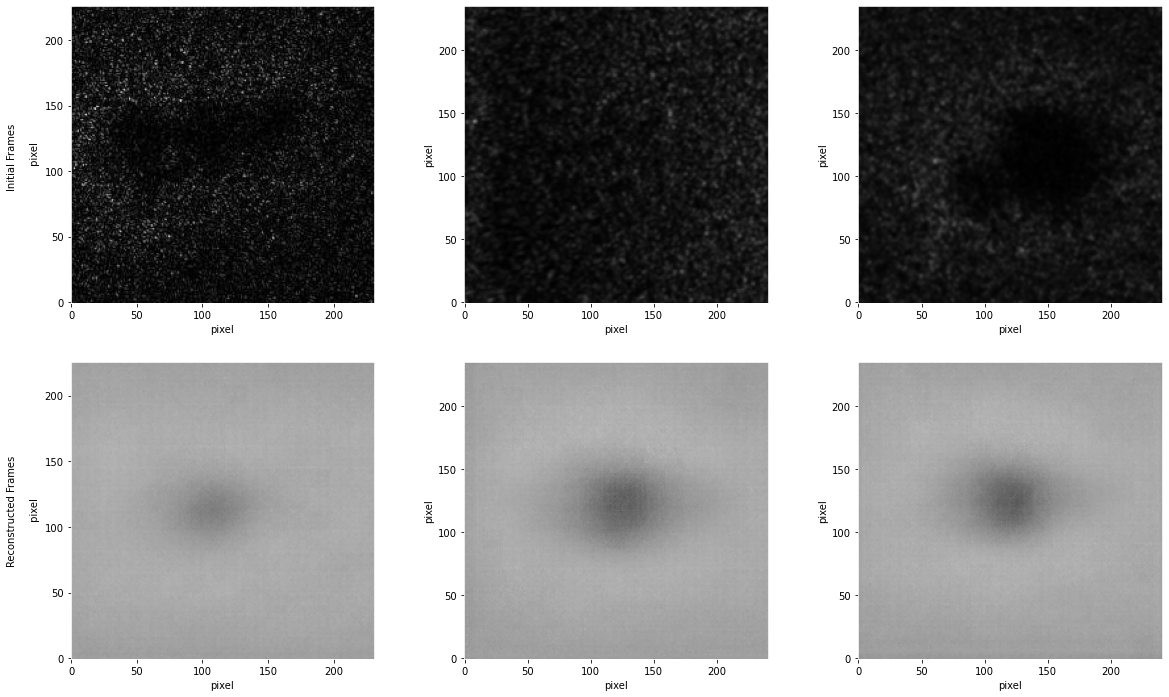

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'


fig = plt.figure(figsize=(20, 12))
columns = 3
rows = 2
idx=1
first_axes = []

for k in range(1,4):
    img = Image.open(f"./figures/init_{k}.png")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    first_axes.append(ax)
    ax.imshow(img, origin='lower')
    idx +=1

for k in range(1,4):
    img = Image.open(f"./figures/recons_{k}.png")
    ax = fig.add_subplot(rows, columns, idx)
    ax.set_xlabel(f'pixel')
    ax.set_ylabel(f'pixel')
    first_axes.append(ax)
    ax.imshow(img, origin='lower')
    idx +=1

# plt.show()

for k, axes in enumerate(first_axes):
    if (k == 0):
        axes.set_ylabel(f'Initial Frames \n\n pixel')
    elif (k==3):
        axes.set_ylabel(f'Reconstructed Frames\n\n pixel')
plt.savefig('recons_data.png', transparent=True)

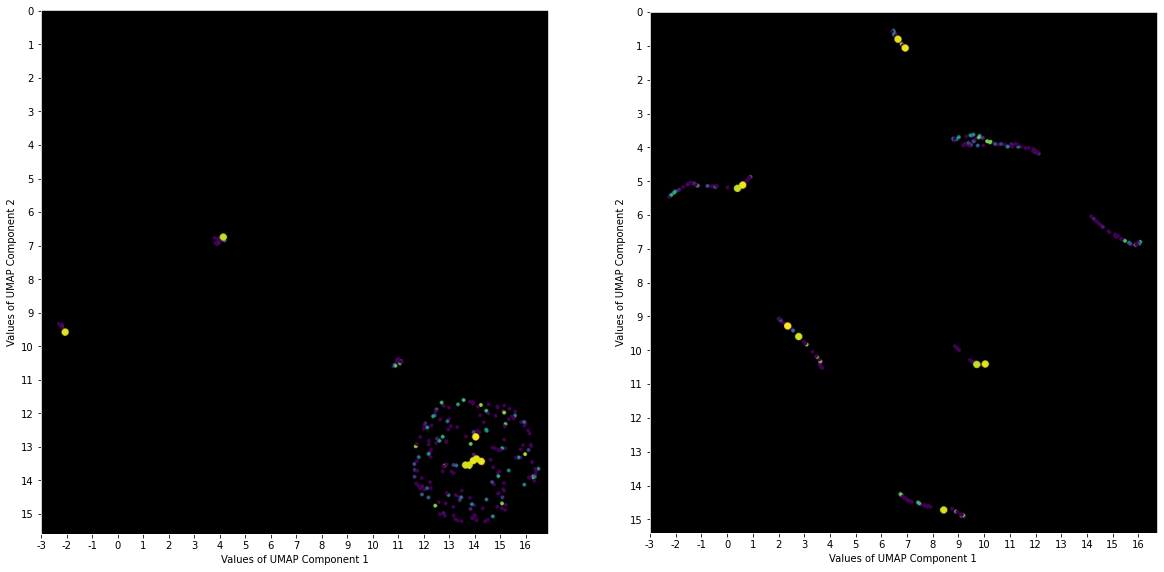

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = '#FFFFFF'


fig = plt.figure(figsize=(20, 12))
columns = 2
rows = 1
idx=1
first_axes = []
img1 = Image.open(f"./figures/umap_250n.png")
ax = fig.add_subplot(rows, columns, idx)
ax.set_xlabel(f'Values of UMAP Component 1')
ax.set_ylabel(f'Values of UMAP Component 2')
plt.xticks([x for x in range(800) if x % 38 ==0],[x for x in range(-3,19)])
plt.yticks([x for x in range(800) if x % 50 ==0 ],[x for x in range(0,16)])
ax.imshow(img1)

idx +=1

img2 = Image.open(f"./figures/umap_all_frames_15n.png")
ax = fig.add_subplot(rows, columns, idx)
ax.set_xlabel(f'Values of UMAP Component 1')
ax.set_ylabel(f'Values of UMAP Component 2')

plt.xticks([x for x in range(800) if x % 38 ==0 ],[x for x in range(-3,19)])
plt.yticks([x for x in range(800) if x % 50 ==0 ],[x for x in range(0,16)])
# plt.yticks([x for x in range(len(img2[0])],[x for x in range(-3,17)])

ax.imshow(img2)


plt.savefig('figures/umap_ae.png', transparent=True)

In [79]:
x.save('/home/vanessa/Desktop/Rezultate/lowpass.png')

In [60]:
img = Image.open("/home/vanessa/Dev/DATASETS/C23_C24_pos-concat/poz/img_poz_1996_07_09_09_01_00_77.png")

ctr = transforms.Compose([
                transforms.Lambda(lambda x: np.transpose(np.asarray(x), (2,0,1))),
                transforms.RandomChoice([lp, tens],p=[1.0,0.0]),
                transforms.RandomHorizontalFlip(p=1),
                transforms.ToPILImage()
            ])
img_tr = ctr(img)


FileNotFoundError: [Errno 2] No such file or directory: '/home/vanessa/Dev/DATASETS/C23_C24_pos-concat/poz/img_poz_1996_07_09_09_01_00_77.png'

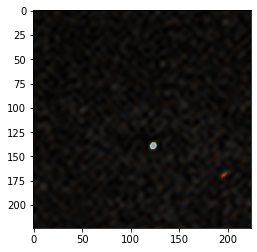

In [50]:
plt.imshow(img_tr)


In [46]:
img1 = Image.open("/home/vanessa-m/Dev/Datasets/C23_simple_pos/poz/img_poz_1996_07_09_09_01_00_77.jpg")

res = train_transform(img1)
print(res.shape)  

plt.imshow(res[0,:,:], 'gray')

FileNotFoundError: [Errno 2] No such file or directory: '/home/vanessa-m/Dev/Datasets/C23_simple_pos/poz/img_poz_1996_07_09_09_01_00_77.jpg'

In [ ]:
def_tr = transforms.Compose([
                transforms.RandomResizedCrop(size=64, scale=(0.2, 1.)),
                transforms.RandomHorizontalFlip(),
                transforms.RandomApply([
                    transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)
                ], p=0.8),
                transforms.RandomGrayscale(p=0.2),
            ])

In [16]:
img1 = Image.open("/home/vanessa-m/Dev/Datasets/C23_simple_pos/poz/img_poz_1996_07_09_09_01_00_81.jpg")
img2 = Image.open("//home/vanessa-m/Dev/Datasets/C23_simple_pos/poz/img_poz_1996_07_09_09_01_00_82.jpg")
img3 = Image.open("//home/vanessa-m/Dev/Datasets/C23_simple_pos/poz/img_poz_1996_07_09_09_01_00_83.jpg")

s= 64
img1 = np.asarray(img1.convert('L').resize(size=(s,s)))
img2 = np.asarray(img2.convert('L').resize(size=(s,s)))
img3 = np.asarray(img3.convert('L').resize(size=(s,s)))

merged = np.stack([img1, img2, img3], axis=0)

res = def_tr(torch.tensor(merged))
print(res.dtype)

plt.imshow(res[2,:,:], 'gray')

FileNotFoundError: [Errno 2] No such file or directory: '/home/vanessa-m/Dev/Datasets/C23_simple_pos/poz/img_poz_1996_07_09_09_01_00_81.jpg'

In [17]:
lp = LowPassTransform3D(threshold=50, probability=1)(merged)
plt.imshow(lp[2,:,:], 'gray')


NameError: name 'merged' is not defined

In [18]:
img = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_27.jpg")

lp2 = LowPassTransform(threshold=50, probability=1)(img)
print(lp.shape, lp2.shape)

plt.imshow(lp2[0,:,:], 'gray')

AttributeError: 'Compose' object has no attribute 'shape'

# 1 channel

In [19]:
rand = transforms.RandomChoice([
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)), # ok
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(degrees=[90,90]),
        transforms.RandomRotation(degrees=[180, 180]),
        transforms.RandomRotation(degrees=[270, 270])
    ])

    # random_tr_no = random.randrange(0, 4, 1)

erase_transform = transforms.RandomApply([
                transforms.RandomErasing(p=0.05, scale=(0.04, 0.05), ratio=(0.2,0.6), value=100),
                transforms.RandomErasing(p=0.05, scale=(0.04, 0.05), ratio=(0.3,0.6), value=100),
                transforms.RandomErasing(p=0.1, scale=(0.03, 0.04), ratio=(0.4,0.6), value=100),
                transforms.RandomErasing(p=0.1, scale=(0.03, 0.04), ratio=(0.5,0.5), value=100),
                transforms.RandomErasing(p=0.2, scale=(0.02, 0.03), ratio=(0.5,0.5), value=100),
                transforms.RandomErasing(p=0.2, scale=(0.02, 0.03), ratio=(0.4,0.6), value=100),
                transforms.RandomErasing(p=0.5, scale=(0.01, 0.02), ratio=(0.3,0.6), value=100),
                transforms.RandomErasing(p=0.5, scale=(0.01, 0.02), ratio=(0.2,0.6), value=100),
    ],p=1)
    

train_transform = transforms.Compose([
                transforms.Resize(224),
                LowPassTransform(threshold=50, probability=1),
                transforms.RandomSolarize(threshold=50, p=1), # foarte bun combinat cu low pass
                rand,
                erase_transform
    ])

img = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_26.jpg")
rs = train_transform(img)
print(rs.dtype)
plt.imshow(rs[0,:,:], 'gray')

TypeError: Input image tensor should have at least 3 dimensions, but found 2

# old

In [20]:
normalize = transforms.Normalize(mean=mean, std=std)

rand = transforms.RandomChoice([
            # transforms.RandomHorizontalFlip(),
            # transforms.RandomVerticalFlip(),
            # transforms.RandomRotation(degrees=[90,90]),
            # transforms.RandomRotation(degrees=[180, 180]),
            # transforms.RandomRotation(degrees=[270, 270]),
            transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)) # ok
            # transforms.RandomAutocontrast(p=0.6), # ok, not much, disable for now
            # transforms.RandomAdjustSharpness(sharpness_factor=0.8, p=0.6), # ok, not much, disable for now
            ])

erase_transform = transforms.RandomApply([
                transforms.RandomErasing(p=0.05, scale=(0.04, 0.05), ratio=(0.2,0.6)),
                transforms.RandomErasing(p=0.05, scale=(0.04, 0.05), ratio=(0.3,0.6)),
                transforms.RandomErasing(p=0.1, scale=(0.03, 0.04), ratio=(0.4,0.6)),
                transforms.RandomErasing(p=0.1, scale=(0.03, 0.04), ratio=(0.5,0.5)),
                transforms.RandomErasing(p=0.2, scale=(0.02, 0.03), ratio=(0.5,0.5)),
                transforms.RandomErasing(p=0.2, scale=(0.02, 0.03), ratio=(0.4,0.6)),
                transforms.RandomErasing(p=0.5, scale=(0.01, 0.02), ratio=(0.3,0.6)),
                transforms.RandomErasing(p=0.5, scale=(0.01, 0.02), ratio=(0.2,0.6)),
    ],p=1)
    
    
train_transform = transforms.Compose([
                transforms.Resize(224),
                LowPassTransform(threshold=50, probability=1),
                transforms.RandomSolarize(threshold=50, p=1), # foarte bun combinat cu low pass
                rand,
                transforms.Grayscale(1),
                transforms.ToTensor(),
                erase_transform,
                # normalize,
                transforms.ToPILImage()
    ])
            

position_tr_list = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=[90,90]),
    transforms.RandomRotation(degrees=[180, 180]),
    transforms.RandomRotation(degrees=[270, 270])
]

random_tr_no = random.randrange(0, 4, 1)


In [21]:
img = Image.open("/home/vanessa/Dev/DATASETS/C23_C24_pos-concat/poz/img_poz_2001_04_06_19_13_00_29.png")

img_tr = train_transform(position_tr_list[0](img))

TypeError: Input image tensor should have at least 3 dimensions, but found 2

In [22]:
plt.imshow(img_tr,'gray')

NameError: name 'img_tr' is not defined

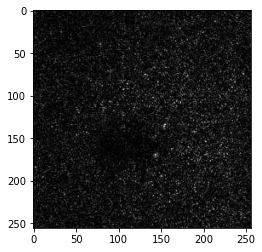

In [23]:
img = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_29.jpg")
plt.imshow(img,'gray')

In [ ]:
import numpy as np

img1 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/neg/img_poz_2001_04_06_11_19.jpg")
img2 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/neg/img_poz_2001_04_06_11_20.jpg")
img3 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/neg/img_poz_2001_04_06_11_21.jpg")

avg = (np.array(img1) + np.array(img2) + np.array(img3)) /3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


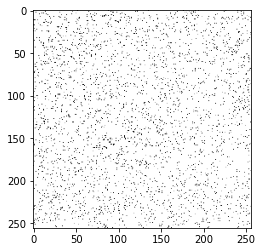

In [ ]:
plt.imshow(avg, 'gray')

In [ ]:
img1 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/neg/img_poz_2001_04_06_11_21.jpg")
img2 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_22.jpg")
img3 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_23.jpg")

avg = (np.array(img1) + np.array(img2) + np.array(img3)) /3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


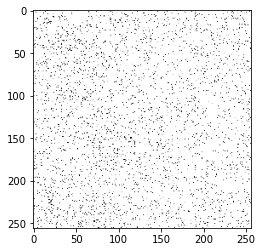

In [ ]:
plt.imshow(avg, 'gray')

In [ ]:
img1 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_25.jpg")
img2 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_26.jpg")
img3 = Image.open("/home/vanessa/Dev/PyTorch-VAE-master/dataset/C23_t/poz/img_poz_2001_04_06_11_27.jpg")

avg = (np.array(img1) + np.array(img2) + np.array(img3)) /3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


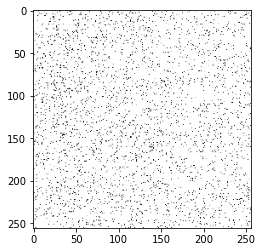

In [ ]:
plt.imshow(avg, 'gray')

# Object Detection

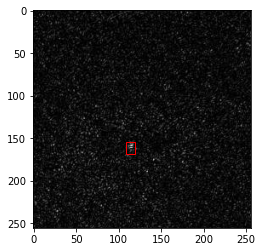

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open("/home/vanessa/Dev/DATASETS/C23_C24_pos_t/poz/img_poz_1996_07_09_09_01_00_82.jpg")


# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

cx = 115.25 #center x
cy = 160.5 #center y
h = 11.5 
w =14 
# Create a Rectangle patch
rect = patches.Rectangle((cx-(w/2), cy - (h/2)), h, w, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()